In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

## Preprocessing

In [51]:
df = pd.read_csv('../training_data/construction_data.csv')
df

,SHRP_ID,STATE_CODE,IMP_DATE,IMP_TYPE
0,0102,1,04/17/2003,24
1,0102,1,04/17/2003,27
2,0107,1,02/07/2001,22
3,0502,1,12/20/1991,43
4,0503,1,12/20/1991,10
...,...,...,...,...
7325,0901,55,10/01/2013,51
7326,0902,55,07/16/1992,10
7327,0902,55,07/16/1992,19
7328,0902,55,07/16/1992,54


<Axes: >

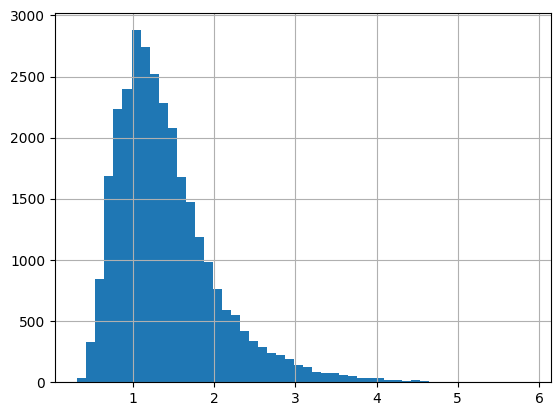

In [14]:
df = pd.read_csv('../training_data/IRI-only.csv')

# df['IRI_LEFT_WHEEL_PATH'].hist(bins=60)
# df[['IRI_LEFT_WHEEL_PATH','IRI_RIGHT_WHEEL_PATH']].boxplot()
df['IRI_LEFT_WHEEL_PATH'].value_counts()

df['Mean_IRI'] = 0.5*(df['IRI_LEFT_WHEEL_PATH']+df['IRI_RIGHT_WHEEL_PATH'])

df['Mean_IRI'].hist(bins=50)

<Axes: >

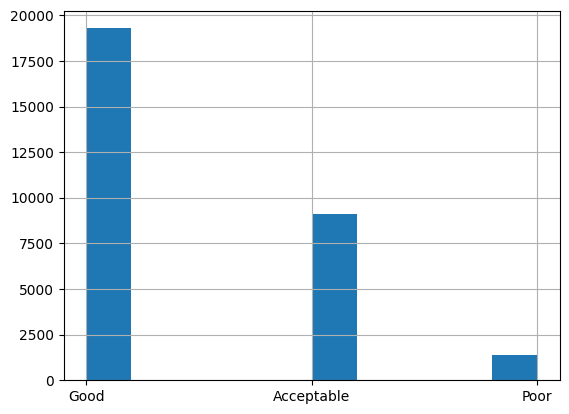

In [15]:
df.loc[df['Mean_IRI'] <= 1.50, 'IRI_condition'] = 'Good'
df.loc[(df['Mean_IRI'] > 1.50) & (df['Mean_IRI'] <= 2.68), 'IRI_condition'] = 'Acceptable'
df.loc[df['Mean_IRI'] > 2.68, 'IRI_condition'] = 'Poor'

df['IRI_condition'].hist()

,STATE_CODE,VISIT_DATE,IRI_LEFT_WHEEL_PATH,IRI_RIGHT_WHEEL_PATH,Mean_IRI,IRI_condition,Year
SHRP_ID,,,,,,,
0001,48,2007-03-16,2.0,2.0,2.0,Acceptable,2007-03-16
0101,12,2012-02-24,1.0,1.0,1.0,Good,2012-02-24
0102,12,2012-02-24,1.0,1.0,1.0,Good,2012-02-24
0103,12,2012-02-24,1.0,1.0,1.0,Good,2012-02-24
0104,39,2016-05-31,1.0,1.0,1.0,Good,2016-05-31
...,...,...,...,...,...,...,...
Q320,48,2001-04-18,1.0,1.0,1.0,Good,2001-04-18
Q330,48,2001-04-18,1.0,1.0,1.0,Good,2001-04-18
Q340,48,2001-04-18,2.0,1.0,1.5,Good,2001-04-18


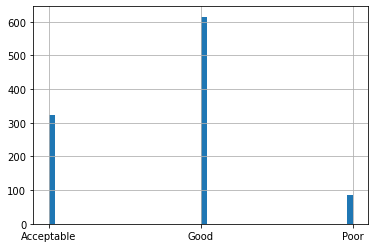

In [61]:
import pandas as pd

# Assuming your table is stored in a DataFrame called 'df'
# and the column names are 'Road', 'Year', and 'Score'

# Convert the 'Year' column to datetime type for proper sorting
df['Year'] = pd.to_datetime(df['VISIT_DATE'])

# Sort the DataFrame by 'Year' in descending order within each 'Road'
df_sorted = df.sort_values(by=['SHRP_ID', 'VISIT_DATE'], ascending=[True, False])

# Group the sorted DataFrame by 'Road' and get the first row (latest year) for each group
latest_scores = df_sorted.groupby('SHRP_ID').first()

# Print the resulting DataFrame with the latest scores for each road
latest_scores['IRI_condition'].hist(bins=50)

latest_scores

There are a lot roads whose IRI is equal to 1 or 2 or 3. is it normal?

In an ideal scenario where the road surface is perfectly smooth, the International Roughness Index (IRI) would be zero. However, in practice, it is challenging to achieve a completely smooth road surface due to various factors such as construction tolerances, material properties, and environmental conditions. Thus, we need to eliminate the 0 value.

- The IRI values are calculated based on the longitudinal profile of the road and are typically reported in units of meters per kilometer (m/km) or inches per mile (in/mi). 

- The higher the IRI value, the rougher the road surface, and vice versa

<AxesSubplot:>

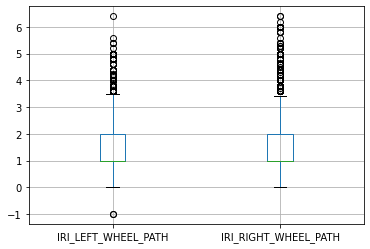

In [27]:
df = pd.read_csv('../training_data/final_data.csv')
df[['IRI_LEFT_WHEEL_PATH','IRI_RIGHT_WHEEL_PATH']].boxplot()

In [31]:
df.head(20)

,SHRP_ID,STATE_CODE,VISIT_DATE,IRI_LEFT_WHEEL_PATH,IRI_RIGHT_WHEEL_PATH,AADT_ALL_VEHIC,MEPDG_TRANS_CRACK_LENGTH_AC
0,0001,48,1990-03-06,1.0,1.0,-1.0,12.881818
1,0001,48,1992-03-17,1.0,1.0,-1.0,12.881818
2,0001,48,1993-07-13,1.0,1.0,-1.0,12.881818
3,0001,48,1995-05-03,1.0,1.0,-1.0,12.881818
4,0001,48,1997-08-06,1.0,1.0,-1.0,12.881818
5,0001,48,1998-02-23,1.0,1.0,-1.0,12.881818
6,0001,48,1999-08-26,1.0,1.0,-1.0,12.881818
7,0001,48,2001-09-11,1.0,1.0,-1.0,12.881818
8,0001,48,2002-01-14,1.2,1.0,-1.0,12.881818
9,0001,48,2004-02-17,1.4,1.0,-1.0,12.881818


<AxesSubplot:>

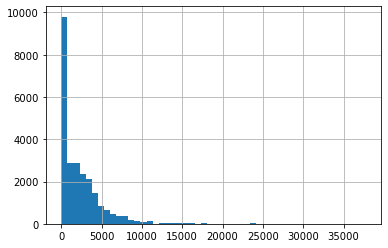

In [26]:
df['AADT_ALL_VEHIC'].hist(bins=50)

In [ ]:
# Load the CSV file
df = pd.read_csv('')

# Extract the features (x and y) and the target variable (v)
X = df[['x', 'y']]
y = df['z']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Create an MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(10,10,10,10,10,10), random_state=42)

# Train the model
model.fit(X_train, y_train)
# model.fit(X,y)

# Evaluate the model on the training set
train_score = model.score(X_train, y_train)
print(f'Training R^2 score: {train_score:.2f}')

# Evaluate the model on the testing set
test_score = model.score(X_test, y_test)
print(f'Testing R^2 score: {test_score:.2f}')

